In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import glob
import os
import unidecode

In [37]:
def read_csvs(path):
    folders = []
    directory = os.path.join(path)
    for root,dirs,files in os.walk(directory):
        folders.append(root)
    del folders[0]

    data_final = []
    for folder in folders:
        df = pd.concat(map(pd.read_csv, glob.glob(os.path.join(folder + "/*.csv"))))
        state_name = folder.split("/")[-1]
        state_name = unidecode.unidecode(state_name.lower())
        state_name = state_name.replace(" ", "_")
        df['estado'] = state_name
        data_final.append(df)
    
    concat_data = pd.concat(data_final,ignore_index=True)
    return concat_data

In [56]:
data = read_csvs("./scraped_data_2022/")
data.dropna(subset = ['Unidades'],inplace=True)
data.drop(['Descripción', 'Tarifa'], axis=1, inplace=True)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153708 entries, 0 to 153713
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Int. Horario    153708 non-null  object 
 1   Cargo           153708 non-null  object 
 2   Unidades        153708 non-null  object 
 3   Valor           153708 non-null  float64
 4   year            153708 non-null  int64  
 5   month           153708 non-null  int64  
 6   state           153708 non-null  object 
 7   municipality    153708 non-null  int64  
 8   division        153708 non-null  object 
 9   division_value  153708 non-null  int64  
 10  estado          153708 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 14.1+ MB


In [55]:
data.Descripción.value_counts()

Gran demanda en media tensión horaria    153708
Name: Descripción, dtype: int64

In [74]:
data[data.estado=='zacatecas'].groupby('division').agg([np.mean, np.std, np.min, np.max])

C:\Users\roker\AppData\Local\Temp\ipykernel_22388\2220316867.py:1: FutureWarning: ['Int. Horario', 'Cargo', 'Unidades', 'state', 'estado'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data[data.estado=='zacatecas'].groupby('division').agg([np.mean, np.std, np.min, np.max])


Valor                                year       \
                            mean         std    amin    amax    mean  std   
division                                                                    
BAJÍO                 125.472722  144.956629  0.9541  374.56  2022.0  0.0   
BAJÍO Y GOLFO CENTRO  125.472722  145.542359  0.9541  374.56  2022.0  0.0   
JALISCO               146.111408  156.519255  0.9178  374.56  2022.0  0.0   

                                 month                     municipality  \
                      amin  amax  mean       std amin amax         mean   
division                                                                  
BAJÍO                 2022  2022   5.5  2.872717    1   10  2414.454545   
BAJÍO Y GOLFO CENTRO  2022  2022   5.5  2.884324    1   10  2401.000000   
JALISCO               2022  2022   5.5  2.884324    1   10  2402.000000   

                                            division_value                 
                            std  amin  amax           mean  std amin amax  
division                                                                   
BAJÍO                 16.502438  2385  2442            3.0  0.0    3    3  
BAJÍO Y GOLFO CENTRO   9.037736  2392  2410            4.0  0.0    4    4  
JALISCO               16.067086  2386  2418           17.0  0.0   17   17

In [81]:
data[(data.estado=='zacatecas')&(data.Cargo=='Fijo')].groupby('division').agg([np.mean, np.std, np.min, np.max])

C:\Users\roker\AppData\Local\Temp\ipykernel_22388\1373843595.py:1: FutureWarning: ['Int. Horario', 'Cargo', 'Unidades', 'state', 'estado'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data[(data.estado=='zacatecas')&(data.Cargo=='Fijo')].groupby('division').agg([np.mean, np.std, np.min, np.max])


Valor                         year                   \
                        mean  std    amin    amax    mean  std  amin  amax   
division                                                                     
BAJÍO                 277.76  0.0  277.76  277.76  2022.0  0.0  2022  2022   
BAJÍO Y GOLFO CENTRO  277.76  0.0  277.76  277.76  2022.0  0.0  2022  2022   
JALISCO               333.35  0.0  333.35  333.35  2022.0  0.0  2022  2022   

                     month                     municipality                   \
                      mean       std amin amax         mean        std  amin   
division                                                                       
BAJÍO                  5.5  2.874896    1   10  2414.454545  16.514958  2385   
BAJÍO Y GOLFO CENTRO   5.5  2.946898    1   10  2401.000000   9.233805  2392   
JALISCO                5.5  2.946898    1   10  2402.000000  16.415654  2386   

                           division_value                 
                      amax           mean  std amin amax  
division                                                  
BAJÍO                 2442            3.0  0.0    3    3  
BAJÍO Y GOLFO CENTRO  2410            4.0  0.0    4    4  
JALISCO               2418           17.0  0.0   17   17

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

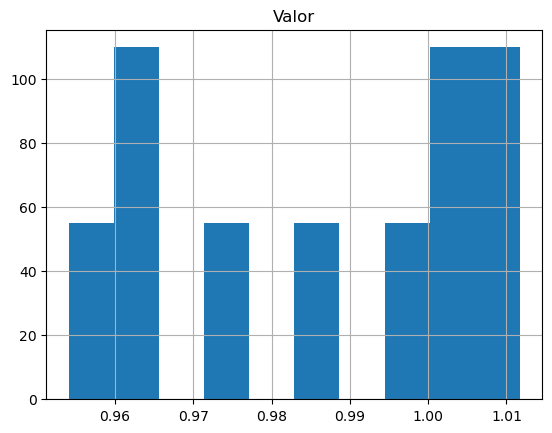

In [90]:
data[(data.estado=='zacatecas')&(data['Int. Horario']=='Base')&(data.division=='BAJÍO')][['Valor']].hist()

In [91]:
data[(data.estado=='zacatecas')&(data['Int. Horario']=='Base')].groupby('division').agg([np.mean, np.std, np.min, np.max])

C:\Users\roker\AppData\Local\Temp\ipykernel_22388\3265261684.py:1: FutureWarning: ['Int. Horario', 'Cargo', 'Unidades', 'state', 'estado'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data[(data.estado=='zacatecas')&(data['Int. Horario']=='Base')].groupby('division').agg([np.mean, np.std, np.min, np.max])


Valor                              year             \
                         mean       std    amin    amax    mean  std  amin   
division                                                                     
BAJÍO                 0.98607  0.020749  0.9541  1.0117  2022.0  0.0  2022   
BAJÍO Y GOLFO CENTRO  0.98607  0.021268  0.9541  1.0117  2022.0  0.0  2022   
JALISCO               0.94817  0.020230  0.9178  0.9725  2022.0  0.0  2022   

                           month                     municipality             \
                      amax  mean       std amin amax         mean        std   
division                                                                       
BAJÍO                 2022   5.5  2.874896    1   10  2414.454545  16.514958   
BAJÍO Y GOLFO CENTRO  2022   5.5  2.946898    1   10  2401.000000   9.233805   
JALISCO               2022   5.5  2.946898    1   10  2402.000000  16.415654   

                                 division_value                 
                      amin  amax           mean  std amin amax  
division                                                        
BAJÍO                 2385  2442            3.0  0.0    3    3  
BAJÍO Y GOLFO CENTRO  2392  2410            4.0  0.0    4    4  
JALISCO               2386  2418           17.0  0.0   17   17

In [88]:
data.head(6)

,Int. Horario,Cargo,Unidades,Valor,year,month,state,municipality,division,division_value,estado
0,-,Fijo,$/mes,277.7600,2022,1,AGUASCALIENTES,1,BAJÍO,3,aguascalientes
1,Base,Variable (Energía),$/kWh,0.9541,2022,1,AGUASCALIENTES,1,BAJÍO,3,aguascalientes
2,Intermedia,Variable (Energía),$/kWh,1.6819,2022,1,AGUASCALIENTES,1,BAJÍO,3,aguascalientes
3,Punta,Variable (Energía),$/kWh,1.9140,2022,1,AGUASCALIENTES,1,BAJÍO,3,aguascalientes
4,-,Distribución,$/kW,107.4500,2022,1,AGUASCALIENTES,1,BAJÍO,3,aguascalientes
5,-,Capacidad,$/kW,348.3600,2022,1,AGUASCALIENTES,1,BAJÍO,3,aguascalientes
